In [183]:
import pandas as pd 
import plotly.express as px
import os

import numpy as np 

csv_path = "../csv/"

pd.set_option('display.max_rows', None)     # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

# for csv_filename in os.listdir("../csv/"):
#     df = pd.read_csv(f"../csv/{csv_filename}")
#     print(csv_filename, df.head())

df = pd.read_csv(csv_path + os.listdir(csv_path)[0])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


Product, Order Date, Order Hour, Purchase Address
Quantity Ordered, Price Each, Sales

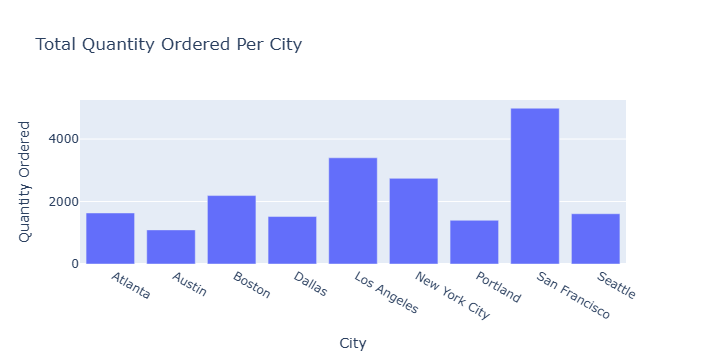

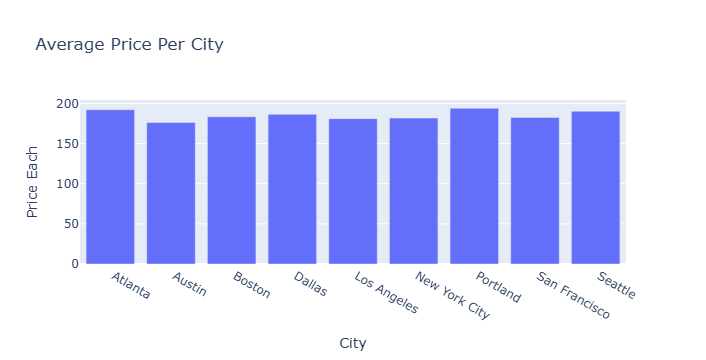

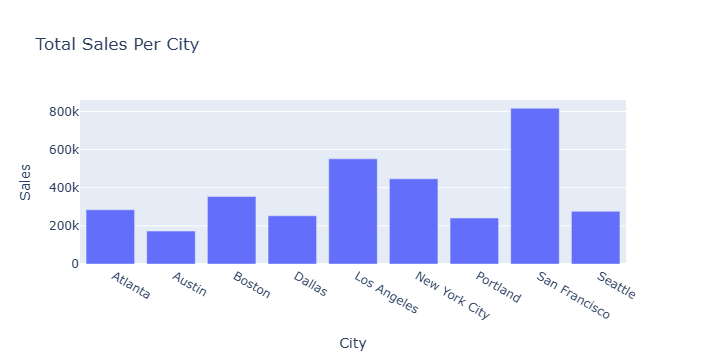

In [215]:

df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"], errors="coerce")
df["Price Each"] = pd.to_numeric(df["Price Each"], errors="coerce")
df["Sales"] = df["Price Each"] * df["Quantity Ordered"]
df["City"] = df["Purchase Address"].str.split(",", expand=True)[1]


df["Order Date"] = pd.to_datetime(df["Order Date"], format="%m/%d/%y %H:%M", errors="coerce")
df["Date"] = df["Order Date"].dt.date
df["Time"] = df["Order Date"].dt.time
df["Month"] = df["Order Date"].dt.month
df["Week"] = df["Order Date"].dt.isocalendar().week
df["Day"] = df["Order Date"].dt.day
df["Hour"] = df["Order Date"].dt.hour



group = ["Product", "Date", "Time", "Month", "Week", "Day", "Hour", "City"]
value_info = ["Quantity Ordered", "Price Each", "Sales"]

group_index = 7

value_info_index = 0
quantity = df.groupby(group[group_index], as_index=False)[value_info[value_info_index]].sum()
quantity_figure = px.bar(quantity, x=group[group_index], y=value_info[value_info_index], title=f"Total Quantity Ordered Per {group[group_index]}")
quantity_figure.show() 


value_info_index = 1
price = df.groupby(group[group_index], as_index=False)[value_info[value_info_index]].mean()
price_figure = px.bar(price, x=group[group_index], y=value_info[value_info_index], title=f"Average Price Per {group[group_index]}")
price_figure.show() 


value_info_index = 2
sales = df.groupby(group[group_index], as_index=False)[value_info[value_info_index]].sum()
sales_figure = px.bar(sales, x=group[group_index], y=value_info[value_info_index], title=f"Total Sales Per {group[group_index]}")
sales_figure.show() 

# print(quantity[value_info[value_info_index]].sum(), price[value_info[value_info_index]].sum(), sales[value_info[value_info_index]].sum()) 

Product, Order Date, Order Hour, Purchase Address
Quantity Ordered, Price Each, Sales